# Multiple Linear Regression using Gradient Descent

In the last notebook, we walked through a high level overview of using gradient descent to solve our multiple linear regression problem. After building in a little more detail and calculating the derivatives that we'll need to perform the update steps, we'll code it up in `numpy`. 

## Gradient Descent for Multiple Linear Regression

### Gradient Descent Procedure 

With gradient descent, we'll do the following: 

1. Randomly initialize values for our coefficients: 
<img src="../imgs/variables/beta0.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=20 \>, 
<img src="../imgs/variables/beta1.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=22 \> , 
<img src="../imgs/variables/beta2.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=19 \> , and
<img src="../imgs/variables/beta3.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=18 \>. 

2. While we haven't met some stopping condition:   
 A. Calculate our predicted outcomes, 
<img src="../imgs/variables/yhat.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=13 \>.  
 B. Calculate the error for each observation using the true values
<img src="../imgs/variables/yi.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=17 \>, 
our predicted values 
<img src="../imgs/variables/yhati.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=16 \>, 
and our error formula: 
<img src="../imgs/equations/ind_squared_error.png" width=110 \>      
 C. For each observation, calculate the gradient of the error with respect to each one of our coefficients (
<img src="../imgs/derivatives/ei_beta0.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=30\>, 
<img src="../imgs/derivatives/ei_beta1.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=30\>, 
<img src="../imgs/derivatives/ei_beta2.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=30\>, 
<img src="../imgs/derivatives/ei_beta3.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=30\>
), and then use the average across observations to update the coefficients (
<img src="../imgs/variables/alpha.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=15\>
 is the learning rate): 
<img src="../imgs/updates/beta0_simp_linear_update.png" width=150 \>
<img src="../imgs/updates/beta1_simp_linear_update.png" width=150 \>
<img src="../imgs/updates/beta2_simp_linear_update.png" width=150 \>
<img src="../imgs/updates/beta3_simp_linear_update.png" width=150 \>

### Derivative Calculations

To calculate the gradients for each observation in 2C, we'll use the chain rule that we looked at last notebook: 

<img src="../imgs/derivatives/ei_beta0_chain.png" width=120\>
<img src="../imgs/derivatives/ei_beta1_chain.png" width=120\>
<img src="../imgs/derivatives/ei_beta2_chain.png" width=120\>
<img src="../imgs/derivatives/ei_beta3_chain.png" width=120\>

We can break these equations down into calculating each of the individual pieces - 
<img src="../imgs/derivatives/ei_yi.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0" width=30\>, 
<img src="../imgs/derivatives/yhati_beta0.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0" width=30\>, 
<img src="../imgs/derivatives/yhati_beta1.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0" width=30\>
<img src="../imgs/derivatives/yhati_beta2.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0" width=30\>, 
<img src="../imgs/derivatives/yhati_beta3.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0" width=35\>. We can calculate those as follows: 

<img src="../imgs/derivatives/ei_yi_soln.png" width=275 \>
<img src="../imgs/derivatives/yhati_beta0_soln.png" width=75 \>
<img src="../imgs/derivatives/yhati_beta1_soln.png" width=90 \>
<img src="../imgs/derivatives/yhati_beta2_soln.png" width=90 \>
<img src="../imgs/derivatives/yhati_beta3_soln.png" width=90 \>

If we plug these back into the original equations, we can obtain our full updates for step 2C: 

<img src="../imgs/derivatives/ei_beta0_chain_soln.png" width=350\>
<img src="../imgs/derivatives/ei_beta1_chain_soln.png" width=290\>
<img src="../imgs/derivatives/ei_beta2_chain_soln.png" width=290\>
<img src="../imgs/derivatives/ei_beta3_chain_soln.png" width=290\>

Now, let's code this up! 

## Multiple Linear Regression using Gradient Descent with `numpy`

To demonstrate using gradient descent to solve our multiple linear regression problem, we'll use the `gen_multiple_linear` function from the `datasets/general.py` script to generate some toy data that follows a multivariate linear relationship with three variables. We'll input a `1d numpy array` of betas as well as a number of observations, and it will output data that follows a multivariate linear relationship (
<img src="../imgs/equations/mult_linear_3_feats.png" width=120 style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" \> ). 
With this data, we'll use gradient descent to learn the values for our coefficients. 

In solving our multiple linear regression problem, we'll work exclusively with vectors and matrices. Instead of having individual beta coefficients (like we did with `beta_0` and `beta_1` in simple linear regression), we'll have a beta vector that will hold each of our betas. This means that the first column of the `xs` matrix returned from `gen_multiple_linear` will be a vector of 1's that will be lined up with our 
<img src="../imgs/variables/beta0.png" style="vertical-align: text-middle; display: inline-block; padding-top:0; margin-top:0;" width=20 \>. Aside from this, our solution for multiple linear regression will look largely the same as our solution for simple linear regression. 

In [1]:
import numpy as np
from datasets.general import gen_multiple_linear
from utils.plotting import plot_errors
%matplotlib inline

In [2]:
def learn_w_gradient_descent(xs, ys): 
    learning_rate = 0.1
    # Step 1 - randomly initialize values for our coefficients.  
    betas_array = np.random.random(size=4)
        
    mses = [] # mean-squared-errors list to keep track of errors over iterations
    for _ in range(5000): 
        # Step 2A - calculate our predicted outcomes. 
        yhats = xs.dot(betas_array)
        yhats = yhats.reshape(len(yhats), 1) # Force `yhats` to have a second 
                                             # dimension for later calculations.
        
        # Step 2B - calculate our errors. 
        diffs = (ys - yhats)
        es = 0.5 * (diffs ** 2)
        mses.append(es.mean())
        
        # Step 2C - calculate the gradient of the error with respect to the coefficients, 
        # and use it to update the coefficients. 
        d_betas_array = -diffs * xs
        betas_array -= learning_rate * d_betas_array.mean(axis=0)
        
    return mses

Final Error: 6.54145011504761e-22


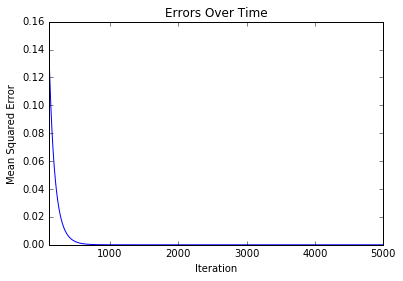

In [3]:
# Randomly generate our betas and number of observations, used to generate 
# fake data to fit. We should have a minimum of 4 obs, since we have 
# four coefficients. 
true_betas_array = np.random.randint(2, 10, size=4)
n_obs = np.random.randint(9500, 10500) 

# Generate the data that follows a linear relationship specified 
# by our `true_betas_array`. 
xs, ys = gen_multiple_linear(true_betas_array, n_obs)

# Learn the coefficients using gradient descent. 
mean_squared_errors = learn_w_gradient_descent(xs, ys)
# Skip the first 100 values because it pulls the y-axis up quite a bit. 
plot_errors(mean_squared_errors, iterations=(100, 5000))
print("Final Error: {}".format(mean_squared_errors[-1]))

Just as with simple linear regression, we see that we can in fact solve multiple linear regression using gradient descent. If we run it multiple times, we see that we can achieve effectively 0 mean squared error each time. We could also play around with the `learning_rate` to see how that changes the mean-squared-errors, and/or look at different subests of the `mean_squared_errors` list (iterations ~300-1000 are much more interesting to look at). 

Viewing multiple linear regression as a computational graph and solving it via gradient descent will help set the stage for understanding complicated neural network architectures that we'll look at in subsequent notebooks. Most (if not all) neural networks can be viewed as having a **forward** and **backward** propagation step where we can use some flavor of gradient descent to update and learn our coefficients (often called weights in neural network land).

We'll now move on to coding this up using `theano`, a python library that allows us to define computational graphs and benefit from automatic differentiation. Libraries like this will be extremely useful when building incredibly complicated neural networks for which it is difficult and time consuming to derive the update rules by hand. 